In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Upload the file
from google.colab import files
uploaded = files.upload()

Saving wdbc.data to wdbc.data


In [ ]:
# Load data
df = pd.read_csv('wdbc.data')

In [ ]:
# Split into feature and target variables
X = df.iloc[:, 2:]
Y = df.iloc[:, 1]
# count of target values
print(Y.value_counts())
# count of the positive class ('M)
positive_count = (Y == 'M').sum()
print("Positive cases (M):", positive_count)

M
B    357
M    211
Name: count, dtype: int64
Positive cases (M): 211


In [ ]:
# View first 5 rows of the data
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
# Generate summary statistics for the data
df.describe()

,842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


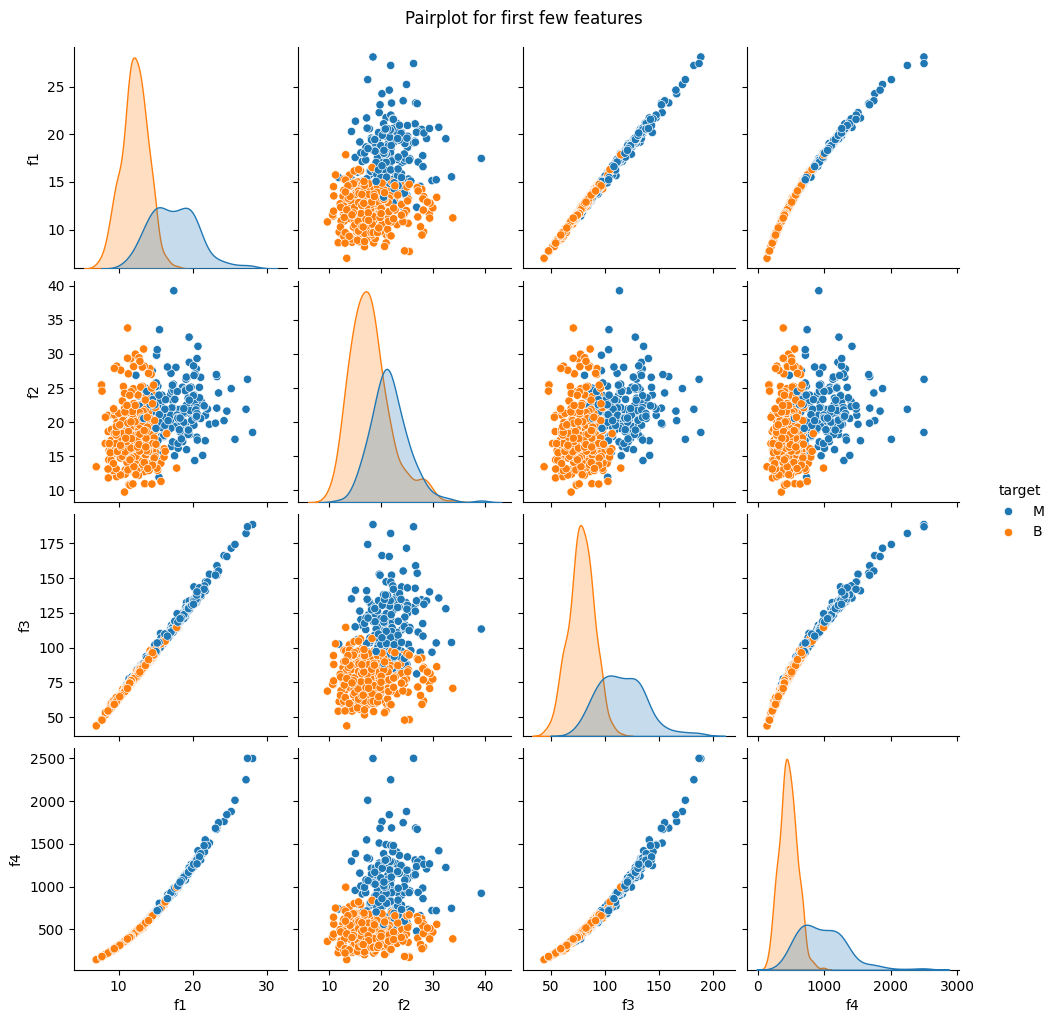

In [ ]:
# Create a pairplot for the first few features
df_pairplot = df.iloc[:,1:6]  # Columns 1 (target) and 2-5 (first few features)
df_pairplot.columns = ['target', 'f1', 'f2', 'f3', 'f4']

# Create pairplot
sns.pairplot(df_pairplot, hue='target', diag_kind='kde')
plt.suptitle('Pairplot for first few features', y=1.02)
plt.show()

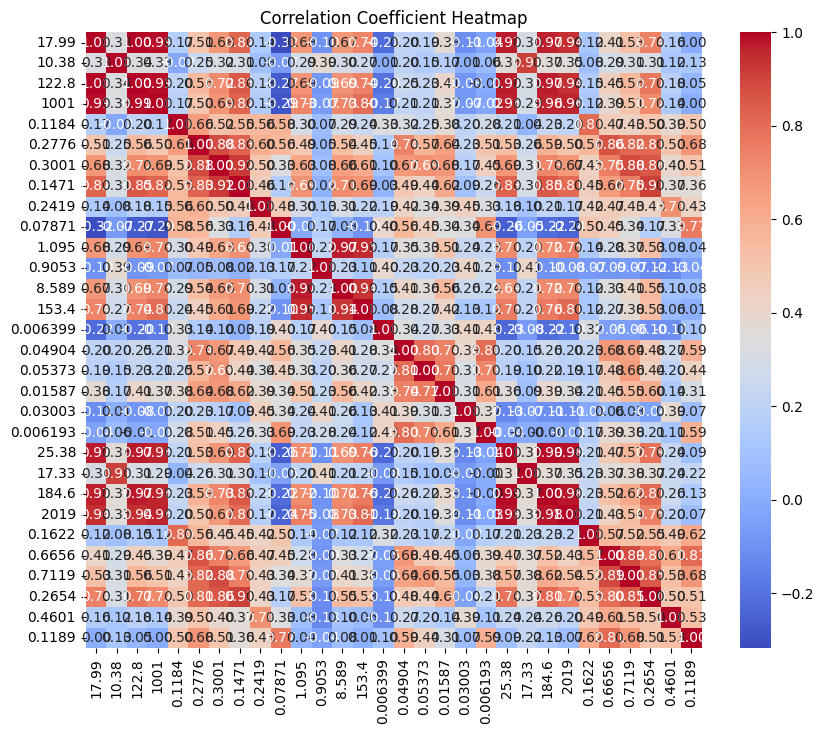

In [ ]:
# Create a correlation coefficeint heatmap
# Compute correlation matrix for features only (skip target)
corr_matrix = X.corr()

#Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Coefficient Heatmap')
plt.show()

Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')


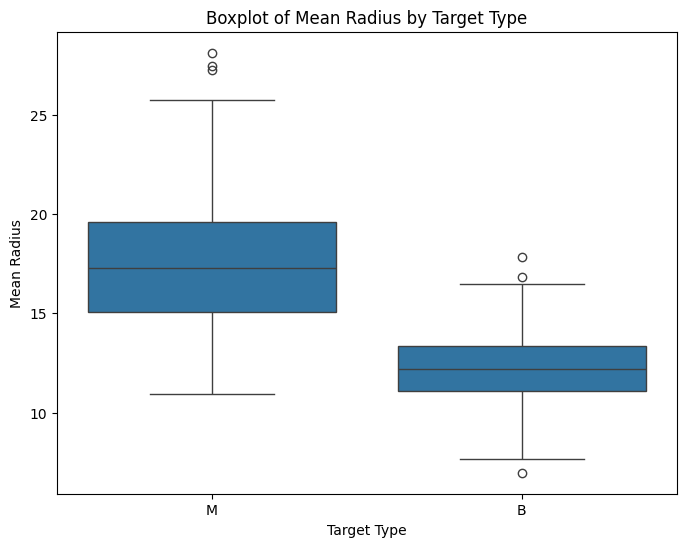

In [ ]:
# Create a boxplot for mean radius by target type
print(df.columns)
df_boxplot = df[['M','17.99']]  # Target in col 1, mean radius in col 2
df_boxplot.columns = ['target', 'mean_radius']

#Create boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='mean_radius', data=df_boxplot)
plt.title('Boxplot of Mean Radius by Target Type')
plt.xlabel('Target Type')
plt.ylabel('Mean Radius')
plt.show()

In [ ]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
248,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
88,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.2604,0.13970,0.3151,0.08473
334,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071,...,20.99,33.15,143.20,1362.0,0.1449,0.2053,0.3920,0.18270,0.2623,0.07599
362,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.1338,0.1679,0.1663,0.09123,0.2394,0.06469
33,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,...,20.21,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.12330


In [ ]:
# Build and train logistic regression model

# If target is 'M'/'B', let’s convert it to 1/0
# y_encoded = Y.map({'M': 1, 'B': 0})

model = LogisticRegression(max_iter=10000) # max_iter to ensure convergence
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           B       0.90      0.97      0.94        68
           M       0.95      0.85      0.90        46

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
TN,FP,FN,TP = cm.ravel()
print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")

TN: 66, FP: 2, FN: 7, TP: 39


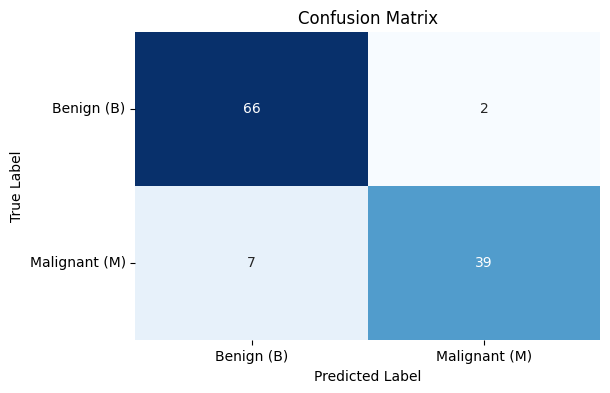

In [ ]:
# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add class names if desired
plt.xticks([0.5, 1.5], ['Benign (B)', 'Malignant (M)'])
plt.yticks([0.5, 1.5], ['Benign (B)', 'Malignant (M)'], rotation=0)

plt.show()

In [ ]:
# Extract coefficients
# Get model coefficients
coefficients = model.coef_[0]  # Coefficients for each feature
intercept = model.intercept_[0]  # Intercept (bias term)

# Show results
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -36.70277649209052
Coefficients: [-0.51122637 -0.234512    0.13472455 -0.01643188  0.13221821  0.13438884
  0.3503737   0.1797618   0.19974274  0.01655682  0.00639581 -1.51106212
 -0.16061415  0.12801688  0.02196096 -0.04183965  0.05282448  0.02458159
  0.00592825 -0.00822108 -0.10500374  0.53401253  0.26441718  0.00303608
  0.29238416  0.55086113  1.24250539  0.41477318  0.45301087  0.08227126]


In [ ]:
# Normalize the coefficients by the standard deviation
# Standard deviation of each feature (X_test to avoid data leakage; or X overall if no scaling applied)
feature_stds = X.std(axis=0)

# Get coefficients
coefficients = model.coef_[0]

# Normalize
normalized_coeffs = coefficients * feature_stds

# Show results
print("Normalized Coefficients:", normalized_coeffs)

Normalized Coefficients: 17.99      -1.801263
10.38      -1.005706
122.8       3.271900
1001       -5.782768
0.1184      0.001857
0.2776      0.007036
0.3001      0.027783
0.1471      0.006942
0.2419      0.005457
0.07871     0.000116
1.095       0.001765
0.9053     -0.834075
8.589      -0.322720
153.4       5.796913
0.006399    0.000066
0.04904    -0.000749
0.05373     0.001595
0.01587     0.000152
0.03003     0.000049
0.006193   -0.000022
25.38      -0.506362
17.33       3.279724
184.6       8.851282
2019        1.724027
0.1622      0.006672
0.6656      0.086223
0.7119      0.258427
0.2654      0.027161
0.4601      0.027864
0.1189      0.001482
dtype: float64


In [ ]:
# Sort feature names and coefficients by absolute value of coefficients

# Create a DataFrame for easy sorting
coeff_df = pd.DataFrame({
    'Feature': feature_stds,
    'Normalized Coefficient': normalized_coeffs
})

# Sort by absolute value of coefficients (largest impact first)
coeff_df['abs_coef'] = coeff_df['Normalized Coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef')

print(coeff_df_sorted)

             Feature  Normalized Coefficient
184.6      33.474687                8.851282
153.4      45.282406                5.796913
1001      351.923751               -5.782768
17.33       6.141662                3.279724
122.8      24.285848                3.271900
17.99       3.523416               -1.801263
2019      567.846267                1.724027
10.38       4.288506               -1.005706
0.9053      0.551979               -0.834075
25.38       4.822320               -0.506362
8.589       2.009288               -0.322720
0.7119      0.207989                0.258427
0.6656      0.156523                0.086223
0.4601      0.061508                0.027864
0.3001      0.079294                0.027783
0.2654      0.065484                0.027161
0.2776      0.052355                0.007036
0.1471      0.038617                0.006942
0.1622      0.022818                0.006672
0.2419      0.027319                0.005457
0.1184      0.014046                0.001857
1.095     

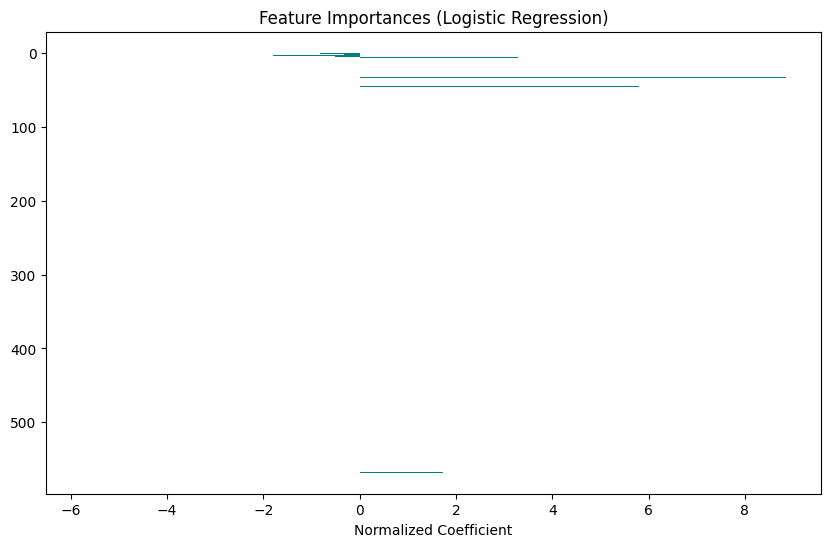

In [ ]:
# Reuse the sorted dataframe from before
plt.figure(figsize=(10, 6))
plt.barh(coeff_df_sorted['Feature'], coeff_df_sorted['Normalized Coefficient'], color='teal')

# Add title and labels
plt.xlabel('Normalized Coefficient')
plt.title('Feature Importances (Logistic Regression)')
plt.gca().invert_yaxis()  # Largest at top

plt.show()